# Homework 1
Mikołaj Piórczyński

## Task 1

In [60]:
import numpy as np

# [[TN, FP], [FN, TP]] in fractions
red = np.array([
    [0.25, 0.25],
    [0.25, 0.25]
])

blue = np.array([
    [0.15, 0.05],
    [0.2, 0.6]
])

In [70]:
def calculate_demographic_parity(cm_a, cm_b):
    """
    Calculate the demographic parity based on the two confusion matrices.
    Demographic parity is defined as:
        P(Y_hat = 1 | A = a) / P(Y_hat = 1 | A = b) ~ 1
    and in terms of confusion matrices:
        PR_a / PR_b ~ 1
    where 
        PR = (FP + TP) / (TN + FP + FN + TP)
    """
    def _demographic_parity(cm):
        return cm[:, 1].sum() / cm.sum()
    
    return _demographic_parity(cm_a) / _demographic_parity(cm_b)
    
print(f"Demographic Parity: {calculate_demographic_parity(red, blue)}")

Demographic Parity: 0.7692307692307692


In [68]:
def calculate_equal_opportunity(cm_a, cm_b):
    """
    Calculate the equal opportunity based on the two confusion matrices.
    Equal opportunity is defined as:
        P(Y_hat = 1 | Y = 1, A = a) / P(Y_hat = 1 | Y = 1, A = b) ~ 1
    and in terms of confusion matrices:
        TPR_a / TPR_b ~ 1
    where 
        TPR = TP / (FN + TP)
    """
    def _equal_opportunity(cm):
        return cm[1, 1] / cm[1].sum()
    
    return _equal_opportunity(cm_a) / _equal_opportunity(cm_b)

print(f"Equal Opportunity: {calculate_equal_opportunity(red, blue)}")

Equal Opportunity: 0.6666666666666667


In [71]:
def calculate_predictive_parity_rate(cm_a, cm_b):
    """
    Calculate the predictive parity rate based on the two confusion matrices.
    Predictive parity rate is defined as:
        P(Y = 1 | Y_hat = 1, A = a) / P(Y = 1 | Y_hat = 1, A = b) ~ 1
    and in terms of confusion matrices:
        (PPV_a / NPV_a) / (PPV_b / NPV_b) ~ 1
    where 
        PPV / NPV = (TP / (TP + FP)) / (TN / (TN + FN))
    """
    def _predictive_parity_rate(cm):
        return (cm[1, 1] / cm[:, 1].sum()) / (cm[0, 0] / cm[:, 0].sum())
    
    return _predictive_parity_rate(cm_a) / _predictive_parity_rate(cm_b)

print(f"Predictive Parity Rate: {calculate_predictive_parity_rate(red, blue)}")

Predictive Parity Rate: 0.4642857142857143


Based on the results above, we can observe that the model is highly unfair from point of view of all three fairness statistics, making the Blue group privileged. In each case, the statistic's value is outside the [0.8, 1.25] range. To improve demographic parity, the ratio of accepted applicants in red group should be increased. In other cases, I don't see any simple solution, and the best approach, I believe, would be just to train a single joint model for both groups.

## Task 2

In this task, we use the UCI Adult dataset to predict whether a person earns more than $50k per year. The protected attribute for this dataset is gender.

1. We trained a random forest classifier on the dataset using default hyperparameters. The metrics for this model are presented in the table below.
2. As we can observe, the model is highly biased towards males in terms of demographic parity.
3. As a second model, we trained a simple KNN classifier with k = 3. In this case, all metrics are much worse compared to the random forest. However, we can see that the model significantly improves in terms of demographic parity, though unfortunately, this comes at the cost of a lower predictive parity rate.
4. To mitigate bias in the random forest, we calibrated it by increasing the predicted scores for the minority class (females) during inference, proportionally to the imbalance between the underrepresented and overrepresented groups. As we can see, this post-training procedure does not significantly impact utility metrics. However, both demographic parity and equal opportunity improved significantly, with only a relatively small drop in the predictive parity rate.
5. First of all, we can see that we cannot improve all fairness metrics simultaneously, and trade-offs between them are necessary.
In our study, the correlation between model performance and fairness does not seem strong, but it is important to note that the study was not exhaustive. It's also worth noting that the simple calibration procedure can significantly improve certain fairness metrics without a significant drop in utility metrics.


**Utility metrics**
|             | accuracy | precision | recall   | f1       |
|-------------|----------|-----------|----------|----------|
| rf          | 0.858898 | 0.741840  | 0.636537 | 0.685166 |
| knn         | 0.759558 | 0.502054  | 0.388924 | 0.438307 |
| rf_balanced | 0.855827 | 0.720363  | 0.657543 | 0.687521 |

**Fairness metrics**
|             | demographic_parity | equal_opportunity | predictive_parity_rate |
|-------------|--------------------|-------------------|------------------------|
| rf          | 0.283840           | 0.775660          | 0.893730               |
| knn         | 0.582737           | 0.731055          | 0.379962               |
| rf_balanced | 0.433596           | 0.990759          | 0.735641               |

## Appendix

In [5]:
import pandas as pd

# column names based on the UCI Adult dataset documentation
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 
    'marital-status', 'occupation', 'relationship', 'race', 'sex', 
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# URL for the UCI Adult dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# load data
adult_data = pd.read_csv(url, header=None, names=column_names, na_values=' ?')
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# 1. Train a model for the selected dataset.
from sklearn.model_selection import train_test_split

# separate target from the features
X = adult_data.drop('income', axis=1)
y = adult_data['income'].apply(lambda x: 1 if x == ' >50K' else 0)

# merge non-white races into a single category
X['race'] = X['race'].apply(lambda x: 'White' if x == ' White' else 'Non-White')

# split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:

# preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
 
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# fill numerical missing values with the mean
numerical_transformer = SimpleImputer(strategy='mean')

# fill categorical missing values with the most frequent value and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

# train model
knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_utility_metrics(y_true, y_pred):    
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred)
    }

In [10]:
# evaluate model
y_pred_knn = knn.predict(X_test)
knn_utility_metrics = calculate_utility_metrics(y_test, y_pred_knn)
knn_utility_metrics

{'accuracy': 0.7595578074619991,
 'precision': 0.5020542317173378,
 'recall': 0.38892425206874603,
 'f1': 0.4383070301291248}

In [11]:
# 2. For the selected protected attribute (age, gender, race) calculate the following fairness coefficients: Statistical parity, Equal opportunity, Predictive parity.
from sklearn.metrics import confusion_matrix

def calculate_fairness_metrics(y_true, y_pred, protected_attribute):
    
    def _calculate_fairness_metrics_for_group(cm):
        # cm = [[TN, FP], [FN, TP]]
        return {
            'demographic_parity': cm[:, 1].sum() / cm.sum(), # PR = (FP + TP) / (TN + FP + FN + TP)
            'equal_opportunity': cm[1, 1] / cm[1].sum(), # TPR = TP / (TP + FN)
            'predictive_parity_rate': (cm[1, 1] / cm[:, 1].sum()) / (cm[0, 0] / cm[:, 0].sum()) # PPV / NPV = (TP / (TP + FP)) / (TN / (TN + FN))
        }
    
    df = pd.DataFrame({"y_true": y_true, "y_pred": y_pred, "protected_attribute": protected_attribute})
    fairness_metrics = {}
    for group_name, group_data in df.groupby(protected_attribute):
        group_confusion_matrix = confusion_matrix(group_data['y_true'], group_data['y_pred'])
        fairness_metrics[group_name] = _calculate_fairness_metrics_for_group(group_confusion_matrix)
    
    fairness_metrics = pd.DataFrame(fairness_metrics).T
    # add row with ratio between non-privileged and privileged groups
    assert len(fairness_metrics) == 2, "Only two groups are supported"
    fairness_metrics.loc['Ratio'] = fairness_metrics.iloc[0] / fairness_metrics.iloc[1]
    return fairness_metrics

In [12]:
knn_fairness_metrics = calculate_fairness_metrics(y_test, y_pred_knn, X_test["sex"])
knn_fairness_metrics

,demographic_parity,equal_opportunity,predictive_parity_rate
Female,0.126058,0.296137,0.282388
Male,0.216321,0.405082,0.743201
Ratio,0.582737,0.731055,0.379962


In [13]:
# 3. Train another model (different hyperparameters, feature transformations etc., different family of models) and see how the coefficients Statistical parity, Equal opportunity, Predictive parity behave for it. Are they different/similar?
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# train model
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [14]:
# evaluate model
y_pred_rf = rf.predict(X_test)
rf_utility_metrics = calculate_utility_metrics(y_test, y_pred_rf)
rf_utility_metrics

{'accuracy': 0.8588975894365116,
 'precision': 0.7418397626112759,
 'recall': 0.6365372374283895,
 'f1': 0.6851661527920521}

In [15]:
rf_fairness_metrics = calculate_fairness_metrics(y_test, y_pred_rf, X_test["sex"])
rf_fairness_metrics

,demographic_parity,equal_opportunity,predictive_parity_rate
Female,0.076670,0.510730,0.775073
Male,0.270116,0.658445,0.867234
Ratio,0.283840,0.775660,0.893730


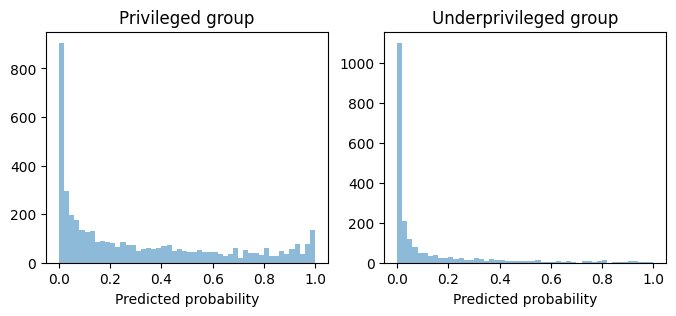

In [16]:
import matplotlib.pyplot as plt

rf_y_prob = rf.predict_proba(X_test)[:, 1]
protected_attribute = "sex"
underprivileged_group = " Female"
underprivileged_group_idx = X_test[protected_attribute] == underprivileged_group

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.hist(rf_y_prob[~underprivileged_group_idx], bins=50, alpha=0.5)
plt.title("Privileged group")
plt.xlabel("Predicted probability")

plt.subplot(1, 2, 2)
plt.hist(rf_y_prob[underprivileged_group_idx], bins=50, alpha=0.5)
plt.title("Underprivileged group")

plt.xlabel("Predicted probability")
plt.show()

In [17]:
# 4. Apply the selected bias mitigation technique (like data balancing) on the first model. Check how Statistical parity, Equal opportunity, Predictive parity coefficients behave after this mittigation.

class CalibratedClassifier:
    def __init__(self, base_classifer, calibration_factor, protected_attribute, underprivileged_group):
        self.base_classifier = base_classifer
        self.calibration_factor = calibration_factor
        self.protected_attribute = protected_attribute
        self.underprivileged_group = underprivileged_group

    def predict(self, X):
        probs = self.base_classifier.predict_proba(X)
        unprivileged_group_idx = X[self.protected_attribute] == self.underprivileged_group
        probs[unprivileged_group_idx, 1] *= self.calibration_factor
        return probs.argmax(axis=1)

In [18]:
print(f"Disproportionality factor: {sum(X_train['sex'] == ' Male') / sum(X_train['sex'] == ' Female')}")

Disproportionality factor: 2.0130711393869287


In [19]:
rf_balanced = CalibratedClassifier(base_classifer=rf, calibration_factor=2.0, protected_attribute="sex", underprivileged_group=" Female")

In [20]:
# evaluate model
y_pred_rf_balanced = rf_balanced.predict(X_test)
rf_balanced_utility_metrics = calculate_utility_metrics(y_test, y_pred_rf_balanced)
rf_balanced_utility_metrics

{'accuracy': 0.8558268079226163,
 'precision': 0.7203626220362622,
 'recall': 0.6575429662635264,
 'f1': 0.6875207986688852}

In [21]:
rf_balanced_fairness_metrics = calculate_fairness_metrics(y_test, y_pred_rf_balanced, X_test["sex"])
rf_balanced_fairness_metrics

,demographic_parity,equal_opportunity,predictive_parity_rate
Female,0.117121,0.652361,0.637973
Male,0.270116,0.658445,0.867234
Ratio,0.433596,0.990759,0.735641


In [22]:
# 5. Compare the quality (performance) of the three models with their fairness coefficients. Is there any correlation/trade off?

In [23]:
utility_metrics = pd.DataFrame([knn_utility_metrics, rf_utility_metrics, rf_balanced_utility_metrics], index=["knn", "rf", "rf_balanced"])
utility_metrics

,accuracy,precision,recall,f1
knn,0.759558,0.502054,0.388924,0.438307
rf,0.858898,0.741840,0.636537,0.685166
rf_balanced,0.855827,0.720363,0.657543,0.687521


In [25]:
fairness_metrics = pd.DataFrame(
    [
        knn_fairness_metrics.loc["Ratio"].to_dict(),
        rf_fairness_metrics.loc["Ratio"].to_dict(), 
        rf_balanced_fairness_metrics.loc["Ratio"].to_dict()
    ], 
    index=["knn", "rf", "rf_balanced"]
)
fairness_metrics

,demographic_parity,equal_opportunity,predictive_parity_rate
knn,0.582737,0.731055,0.379962
rf,0.283840,0.775660,0.893730
rf_balanced,0.433596,0.990759,0.735641
